## Problema de prueba de hipótesis


**Supongamos que se tiene una línea de producción de cierto producto, en donde el
envasado debe llenar cajas con 720 gramos. Sin embargo, se sospecha que las
máquinas no están calibradas, por lo que las cajas se podrían estar llenando con una
cantidad de producto inadecuada (en exceso o en defecto). Se sabe además que las
máquinas funcionan con un error estándar de 7 gramos.
El objetivo es determinar si las máquinas funcionan correctamente.**


Sea X la VA que resulta de pesar un conjunto de cajas en una MA de tamaño N.

$$X:\Omega\to R$$

Se quiere probar la hipótesis:

$$H_0: \mu=720$$

El estadístico de la prueba es $$\hat{\mu} = \bar{X}$$

Primero veamos cómo es la distribución teórica de X bajo hipótesis nula.  Se espera que la distribución sea normal, por el TLC.

$$X \sim N(\mu, \sigma/\sqrt(N))$$

### Distribución del peso de las cajas

Text(0,0.5,u'f')

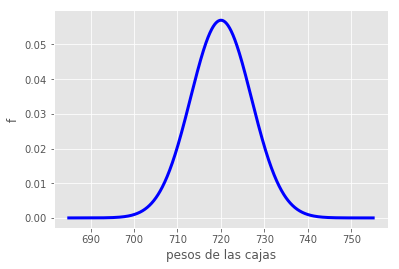

In [96]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

plt.style.use('ggplot')

mean = 720
std = 7

x = np.linspace(mean - 5 * std, mean + 5 * std, 1000)

dist_X = stats.norm(mean, std)
plt.plot(x, dist_X.pdf(x), 'b-', lw=3)
plt.xlabel('pesos de las cajas')
plt.ylabel('f')

### Distribución del promedio de una muestra

Supongamos que tomamos una muestra aleatoria de N=30 cajas, y definimos una nueva VA:

$$MA: \{X_i\}_{i=1}^n$$

$$\bar{X} = \frac{1}{N} \sum_{i=1}^n X_i$$

Por la propiedad reproductiva de la normal, la media se distribuye como:

$$\bar{X} \sim N(\mu, \sigma/\sqrt(N))$$

Text(20.625,0.5,u'f')

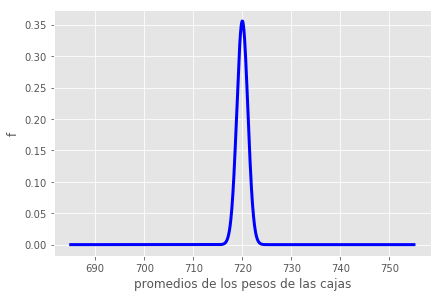

In [97]:
N = 39

std_med = std/np.sqrt(N)
dist_Xmed = stats.norm(mean, std_med)

plt.plot(x, dist_Xmed.pdf(x), 'b-', lw=3)
plt.tight_layout()
plt.xlabel('promedios de los pesos de las cajas')
plt.ylabel('f')

Ahora para hacer la prueba de hipótesis, planetamos un valor para el nivel de confianza.  Supongamos que pedimos un nivel de confianza del 95%

In [98]:
alpha = 0.05
mn = mean - 5 * std_med
mx = mean + 5 * std_med
xm = x = np.linspace(mn, mx, 1000)

q1 = alpha/1
q2 = 1-q1

In [99]:
print dist_Xmed.ppf(q2)

721.843711622


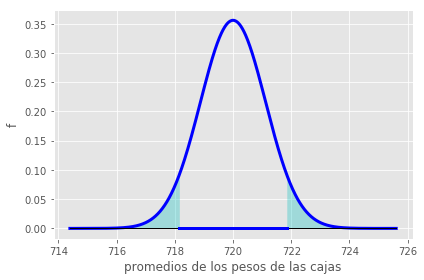

In [100]:
plt.plot(xm, dist_Xmed.pdf(xm), 'b-', lw=3)
plt.fill_between(
        xm, dist_Xmed.pdf(xm),
        where=xm < dist_Xmed.ppf(q1),
        color=color,
        alpha=0.3,
        linewidth=0)
plt.fill_between(
        xm, dist_Xmed.pdf(xm),
        where=xm > dist_Xmed.ppf(q2),
        color=color,
        alpha=0.3,
        linewidth=0)

plt.xlabel('promedios de los pesos de las cajas')
plt.ylabel('f')
plt.plot([mean - 5 * std_med, mean + 5 * std_med],[0,0], c='k', lw=1)
plt.plot([dist_Xmed.ppf(q1), dist_Xmed.ppf(q2)],[0,0], c='blue', lw=3)
plt.tight_layout()

El segmento que corresponde a la parte pintada es la región de rechazo.

### Prueba de hipótesis cuando la hipótesis nula es verdadera

Ahora sorteamos una MA para simular el experimento:

In [101]:
X = dist_X.rvs(N)
print X
Xhat = np.mean(X)
print Xhat

[ 721.68045092  711.87532188  726.55390744  728.41062735  716.80720712
  706.26413816  713.32572397  720.5691898   724.5980846   722.62953198
  717.84111966  721.02218031  718.62386383  710.24140366  717.1931974
  727.40933832  709.07623708  731.5617578   709.05701785  710.86687234
  727.40037219  710.38499779  719.25686809  720.86299772  721.54321299
  718.42041036  716.9165757   716.00866691  715.0639115   718.38044029
  723.36483224  727.94078538  730.64493962  719.60185049  718.48230166
  715.71335716  731.37244138  727.08426954  718.4009173 ]
719.550033841


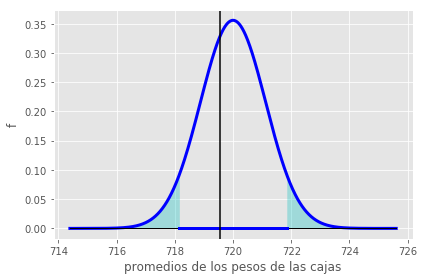

In [102]:
alpha = 0.05
xm = x = np.linspace(mean - 5 * std_med, mean + 5 * std_med, 1000)

q1 = alpha/1
q2 = 1-q1

plt.plot(xm, dist_Xmed.pdf(xm), 'b-', lw=3)
plt.fill_between(
        xm, dist_Xmed.pdf(xm),
        where=xm < dist_Xmed.ppf(q1),
        color=color,
        alpha=0.3,
        linewidth=0)
plt.fill_between(
        xm, dist_Xmed.pdf(xm),
        where=xm > dist_Xmed.ppf(q2),
        color=color,
        alpha=0.3,
        linewidth=0)

plt.xlabel('promedios de los pesos de las cajas')
plt.ylabel('f')
plt.plot([mean - 5 * std_med, mean + 5 * std_med],[0,0], c='k', lw=1)
plt.plot([dist_Xmed.ppf(q1), dist_Xmed.ppf(q2)],[0,0], c='blue', lw=3)
plt.axvline(x=Xhat, c='black')
plt.tight_layout()

## Rechazo de la hipótesis nula y errores teóricos

Supongamos ahora que la hipótesis nula es falsa, las máquinas funcionan mal, y cargan en promedio 712 gramos.  Vamos a probar la hipótesis de que en realidad funcionan bien, es decir:

$$\mu=712$$

$$H_0: \mu=720$$


Ahora la distribución verdadera de los pesos medios de las cajas en muestras de tamaño N y la distribución bajo hipótesis nula no coinciden!

In [131]:
N = 30

# Distribucion verdadera:

mu_true = 718
std_true = 7
std_true_med = std_true/np.sqrt(N)
dist_X_true_med = stats.norm(mu_true, std_true_med)

# Distribución si la hipótesis nula fuera cierta:
mu_H0 = 720
std_H0 = 7
std_H0_med = std_H0/np.sqrt(N)
dist_X_H0_med = stats.norm(mu_H0, std_H0_med)

In [132]:
X = dist_X_true_med.rvs(N)
Xhat = np.mean(X)

Calculemos también el error tipo II

In [133]:
#beta = dist_X_true_med.

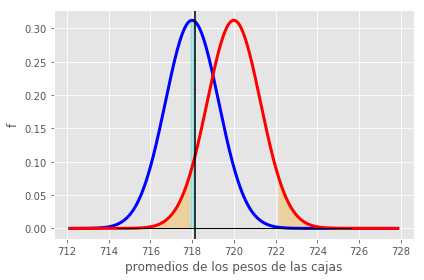

In [136]:
xm = x = np.linspace(mean - 7 * std_med, mean + 7 * std_med, 1000)


plt.plot(xm, dist_X_true_med.pdf(xm), 'b-', lw=3)
plt.fill_between(
        xm, dist_X_true_med.pdf(xm),
        where=np.logical_and(xm < Xhat, xm>dist_X_H0_med.ppf(q1)),
        color=color,
        alpha=0.3,
        linewidth=0)


plt.plot(xm, dist_X_H0_med.pdf(xm), 'r-', lw=3)
plt.fill_between(
        xm, dist_X_H0_med.pdf(xm),
        where=xm < dist_X_H0_med.ppf(q1),
        color='orange',
        alpha=0.3,
        linewidth=0)
plt.fill_between(
        xm, dist_X_H0_med.pdf(xm),
        where=xm > dist_X_H0_med.ppf(q2),
        color='orange',
        alpha=0.3,
        linewidth=0)


plt.xlabel('promedios de los pesos de las cajas')
plt.ylabel('f')
plt.plot([mean - 5 * std_med, mean + 5 * std_med],[0,0], c='k', lw=1)
plt.axvline(x=Xhat, c='black')
plt.tight_layout()